In [ ]:
import sys
sys.path.append(r'C:\Users\festa\OneDrive\Desktop\Thesis\Thesis')
from functions import load_and_process_data, apply_bias_mitigation, evaluate_fairness_metrics, standardize_features, train_classifier_and_find_best_threshold, apply_best_threshold_and_compute_metrics, plot_metrics_dir, plot_metrics_aod, train_classifier_on_transformed_data, extract_fairness_metrics
import numpy as np

pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [2]:
train, val, test, privileged_groups, unprivileged_groups = load_and_process_data('adult', use_disparate_impact_remover=False)

In [3]:
train_transf, test_transf = apply_bias_mitigation('lfr', train, test, unprivileged_groups, privileged_groups)


step: 0, loss: 0.8231572325566694, L_x: 0.47569593826031786,  L_y: 0.7647105192649154,  L_z: 0.007251412977148139
step: 250, loss: 0.6796400514134762, L_x: 0.4744267961817764,  L_y: 0.6217539878570941,  L_z: 0.006962255958802931
step: 500, loss: 0.6043752824051158, L_x: 0.4692228922103318,  L_y: 0.548377674218214,  L_z: 0.00605021264391242
step: 750, loss: 0.6021197434784915, L_x: 0.4657589238100722,  L_y: 0.5472322182754605,  L_z: 0.005541088548015792
step: 1000, loss: 0.5831587397214228, L_x: 0.3892123353138889,  L_y: 0.5299506778036004,  L_z: 0.009524552257622354
step: 1250, loss: 0.5717859599055198, L_x: 0.32874385386662225,  L_y: 0.5175341860110331,  L_z: 0.014251592338549723
step: 1500, loss: 0.568590680239213, L_x: 0.3315274643093061,  L_y: 0.5155319300337052,  L_z: 0.01327066918305149
step: 1750, loss: 0.5464973435397789, L_x: 0.2870129524935514,  L_y: 0.4990259969822407,  L_z: 0.01251336753878866
step: 2000, loss: 0.5321850973458002, L_x: 0.2239882719789338,  L_y: 0.4859696024

In [4]:
train_before_stat_parity_diff, train_before_disp_impact = evaluate_fairness_metrics(train, unprivileged_groups, privileged_groups, "Train Dataset (Before Transformation)")
test_before_stat_parity_diff, test_before_disp_impact = evaluate_fairness_metrics(test, unprivileged_groups, privileged_groups, "Test Dataset (Before Transformation)")

train_after_stat_parity_diff, train_after_disp_impact = evaluate_fairness_metrics(train_transf, unprivileged_groups, privileged_groups, "Train Dataset (After Transformation)")
test_after_stat_parity_diff, test_after_disp_impact = evaluate_fairness_metrics(test_transf, unprivileged_groups, privileged_groups, "Test Dataset (After Transformation)")

print("Train Dataset (Before Transformation) - Statistical Parity Difference:", train_before_stat_parity_diff)
print("Train Dataset (Before Transformation) - Disparate Impact:", train_before_disp_impact)
print("Test Dataset (Before Transformation) - Statistical Parity Difference:", test_before_stat_parity_diff)
print("Test Dataset (Before Transformation) - Disparate Impact:", test_before_disp_impact)

print("Train Dataset (After Transformation) - Statistical Parity Difference:", train_after_stat_parity_diff)
print("Train Dataset (After Transformation) - Disparate Impact:", train_after_disp_impact)
print("Test Dataset (After Transformation) - Statistical Parity Difference:", test_after_stat_parity_diff)
print("Test Dataset (After Transformation) - Disparate Impact:", test_after_disp_impact)


Train Dataset (Before Transformation) - Statistical Parity Difference: -0.1951
Train Dataset (Before Transformation) - Disparate Impact: 0.3572
Test Dataset (Before Transformation) - Statistical Parity Difference: -0.1893
Test Dataset (Before Transformation) - Disparate Impact: 0.3812
Train Dataset (After Transformation) - Statistical Parity Difference: -0.0734
Train Dataset (After Transformation) - Disparate Impact: 0.0000
Test Dataset (After Transformation) - Statistical Parity Difference: -0.0738
Test Dataset (After Transformation) - Disparate Impact: 0.0000


In [5]:
# Standardize the features (scaling)
train, val, test = standardize_features(train, val, test)

# Choose classifier type
classifier_type = 'xgboost'  # Change to 'random_forest' or 'xgboost'

# Train classifier
classifier, best_threshold, best_balanced_acc = train_classifier_and_find_best_threshold(train, val, classifier_type, unprivileged_groups, privileged_groups)


Best Threshold: 0.21000000000000002
Best Balanced Accuracy: 0.7493368420235518


In [6]:
test_metrics, test_scores = apply_best_threshold_and_compute_metrics(classifier, test, best_threshold, unprivileged_groups, privileged_groups)

Balanced Accuracy (test): 0.7281031046238173
Statistical Parity Difference (test): -0.39605845863468947
Disparate Impact (test): 0.27665350217241746
Average Odds Difference (test): -0.33558297681842797
Equal Opportunity Difference (test): -0.352724636589591
Theil Index (test): 0.11343764583326811


In [7]:
%matplotlib inline

c:\Users\festa\AppData\Local\Programs\Python\Python312\Lib\site-packages\aif360\metrics\dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


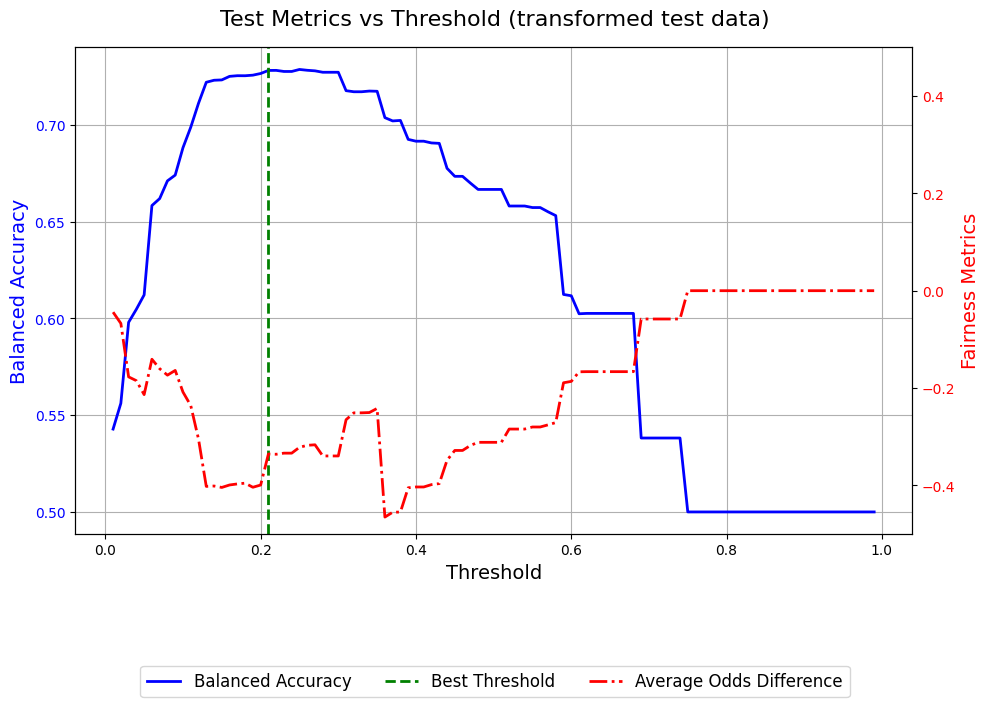

In [8]:
plot_metrics_aod(test, test_scores, best_threshold, unprivileged_groups, privileged_groups)


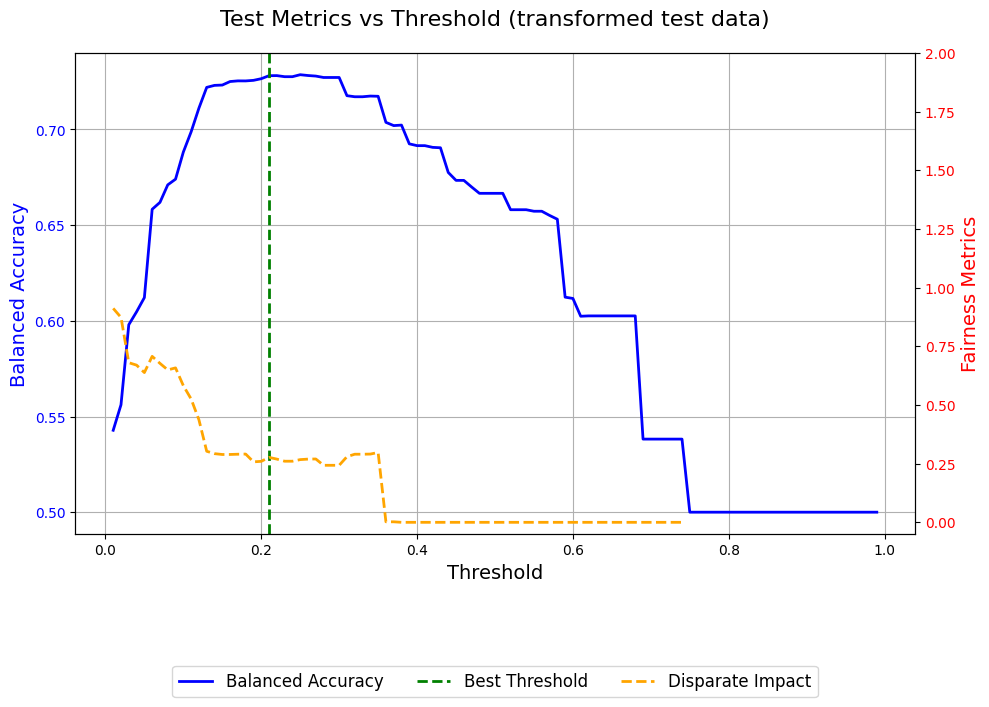

In [9]:
plot_metrics_dir(test, test_scores, best_threshold, unprivileged_groups, privileged_groups)

In [14]:
# Standardize the features (scaling)
train_transf, _ , test_transf = standardize_features(train_transf, val, test_transf)

# Train classifier on transformed data and use the same threshold
classifier_type = 'xgboost'  # Change to 'random_forest' or 'xgboost'
test_transf_classifier, test_transf_scores, test_transf_metrics = train_classifier_on_transformed_data(
    train_transf, test_transf, classifier_type, best_threshold, unprivileged_groups, privileged_groups)


Balanced Accuracy (test transformed): 1.0
Statistical Parity Difference (test transformed): -0.07380903700674708
Disparate Impact (test transformed): 0.0
Average Odds Difference (test transformed): nan
Equal Opportunity Difference (test transformed): nan
Theil Index (test transformed): 0.0


c:\Users\festa\AppData\Local\Programs\Python\Python312\Lib\site-packages\aif360\metrics\classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
c:\Users\festa\AppData\Local\Programs\Python\Python312\Lib\site-packages\aif360\metrics\classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,


In [11]:
%matplotlib inline

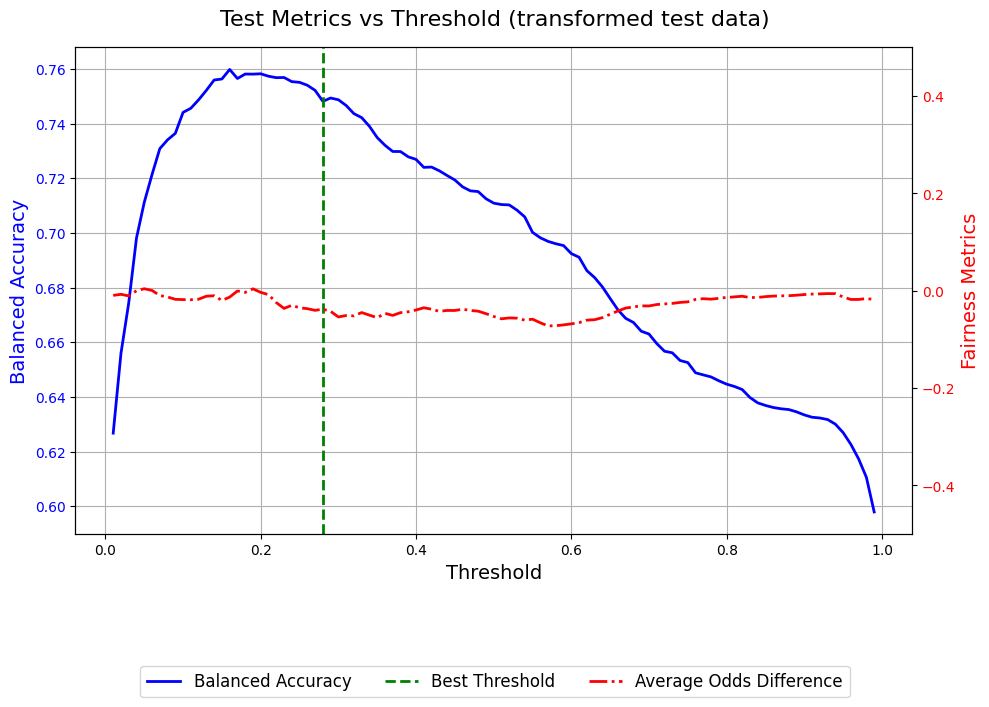

In [13]:
plot_metrics_aod(test_transf, test_transf_scores, best_threshold, unprivileged_groups, privileged_groups)

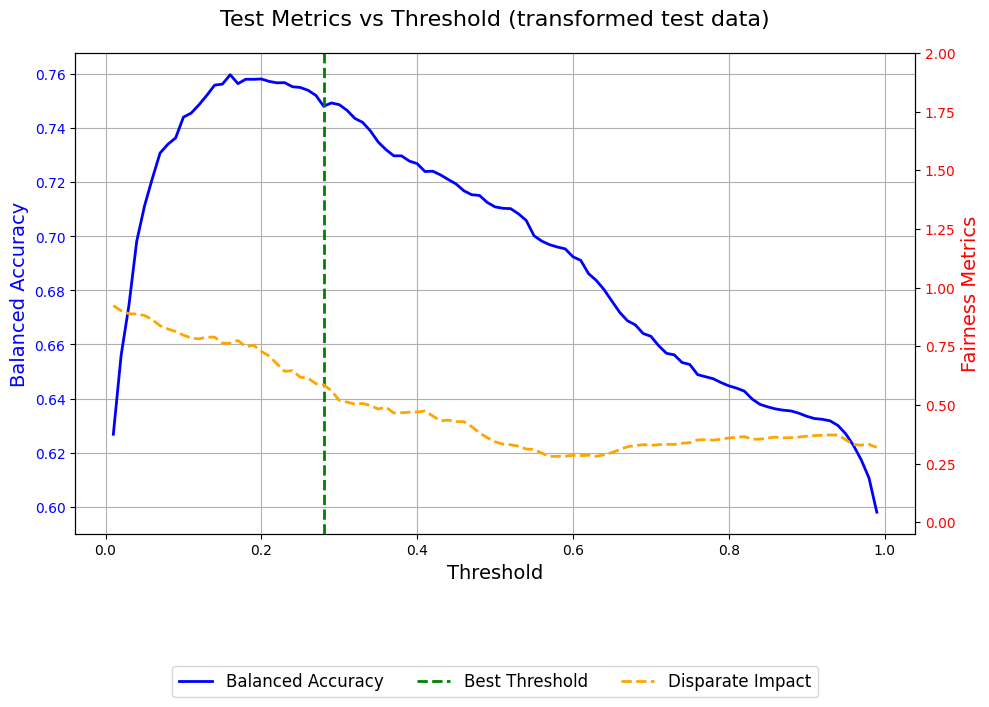

In [14]:
plot_metrics_dir(test_transf, test_transf_scores, best_threshold, unprivileged_groups, privileged_groups)

In [15]:
fairness_metrics, validation_metrics, test_metrics = extract_fairness_metrics(
    train_before_stat_parity_diff, train_after_stat_parity_diff,
    test_before_stat_parity_diff, test_after_stat_parity_diff,
    train_before_disp_impact, train_after_disp_impact,
    test_before_disp_impact, test_after_disp_impact,
    best_threshold, best_balanced_acc,
    test_metrics, test_transf_metrics
)

# Displaying the tables
for table in [fairness_metrics, validation_metrics, test_metrics]:
    display(table.name)
    display(table)


'Fairness Metrics Before and After Transformation'

,Dataset,Stage,Metric,Value
0,Train,Before Transformation,Statistical Parity Difference,-0.1951
1,Train,After Transformation,Statistical Parity Difference,-0.1951
2,Test,Before Transformation,Statistical Parity Difference,-0.1893
3,Test,After Transformation,Statistical Parity Difference,-0.1893
4,Train,Before Transformation,Disparate Impact,0.3572
5,Train,After Transformation,Disparate Impact,0.3572
6,Test,Before Transformation,Disparate Impact,0.3812
7,Test,After Transformation,Disparate Impact,0.3812


'Validation Metrics for Threshold Selection'

,Dataset,Stage,Metric,Value
0,Validation,Best Threshold (Validation),Threshold,0.280000
1,Validation,Best Threshold (Validation),Balanced Accuracy,0.797379


'Test Metrics After Applying Threshold On Original and Transformed'

,Dataset,Stage,Metric,Value
0,Test (Original),After Threshold,Balanced Accuracy,0.777403
1,Test (Transformed),After Threshold,Balanced Accuracy,0.748172
2,Test (Original),After Threshold,Statistical Parity Difference,-0.365472
3,Test (Transformed),After Threshold,Statistical Parity Difference,-0.126479
4,Test (Original),After Threshold,Disparate Impact,0.175115
5,Test (Transformed),After Threshold,Disparate Impact,0.585384
6,Test (Original),After Threshold,Average Odds Difference,-0.317901
7,Test (Transformed),After Threshold,Average Odds Difference,-0.037933
8,Test (Original),After Threshold,Equal Opportunity Difference,-0.383793
9,Test (Transformed),After Threshold,Equal Opportunity Difference,-0.043609
